In [2]:
from google.colab import drive
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
import matplotlib.pyplot as plt

drive.mount('/content/drive',force_remount=True)


BATCH_SIZE = 32
IMG_SIZE = (130, 130)

train_dir = 'drive/MyDrive/imageset/train'
train_dataset = image_dataset_from_directory(train_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)

val_dir = 'drive/MyDrive/imageset/val'
val_dataset = image_dataset_from_directory(val_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)


Mounted at /content/drive
Found 9499 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.


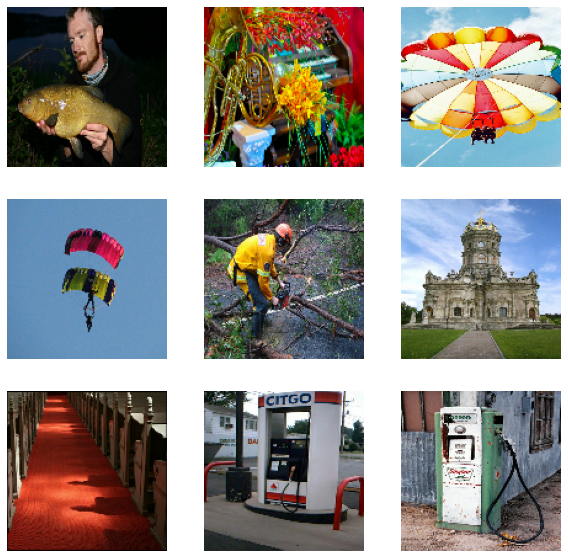

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
 for i in range(9):
   ax = plt.subplot(3, 3, i + 1)
   plt.imshow(images[i].numpy().astype("uint8"))
   plt.axis("off")

In [89]:
import tensorflow as tf

# BASE MODEL

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

epochs=25
num_classes = 10

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/25
297/297 [==============================] - 30s 96ms/step - loss: 1.7097 - accuracy: 0.4129 - val_loss: 1.3274 - val_accuracy: 0.5674
Epoch 2/25
297/297 [==============================] - 3s 11ms/step - loss: 1.1750 - accuracy: 0.6189 - val_loss: 1.2551 - val_accuracy: 0.5926
Epoch 3/25
297/297 [==============================] - 3s 11ms/step - loss: 0.9499 - accuracy: 0.6894 - val_loss: 1.2805 - val_accuracy: 0.5941
Epoch 4/25
297/297 [==============================] - 3s 11ms/step - loss: 0.7635 - accuracy: 0.7510 - val_loss: 1.2376 - val_accuracy: 0.6087
Epoch 5/25
297/297 [==============================] - 3s 11ms/step - loss: 0.6271 - accuracy: 0.7959 - val_loss: 1.4015 - val_accuracy: 0.5845
Epoch 6/25
297/297 [==============================] - 3s 11ms/step - loss: 0.5134 - accuracy: 0.8289 - val_loss: 1.6131 - val_accuracy: 0.5590
Epoch 7/25
297/297 [==============================] - 3s 11ms/step - loss: 0.4179 - accuracy: 0.8620 - val_loss: 1.7831 - val_accuracy: 0.535

In [55]:
# MODEL WITH DATA AUGMENTATION

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

epochs=25
num_classes = 10

data_augmentation = keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                               input_shape=(130,
                                            130,
                                            3)),
   tf.keras.layers.RandomRotation(0.1),
   tf.keras.layers.RandomZoom(0.1),
  ]
)

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
297/297 [==============================] - 31s 99ms/step - loss: 1.7967 - accuracy: 0.3674 - val_loss: 1.6441 - val_accuracy: 0.4471
Epoch 2/10
297/297 [==============================] - 4s 14ms/step - loss: 1.3764 - accuracy: 0.5433 - val_loss: 1.3964 - val_accuracy: 0.5350
Epoch 3/10
297/297 [==============================] - 4s 13ms/step - loss: 1.2265 - accuracy: 0.5992 - val_loss: 1.4126 - val_accuracy: 0.5429
Epoch 4/10
297/297 [==============================] - 4s 13ms/step - loss: 1.1346 - accuracy: 0.6232 - val_loss: 1.3913 - val_accuracy: 0.5411
Epoch 5/10
297/297 [==============================] - 4s 14ms/step - loss: 1.0641 - accuracy: 0.6469 - val_loss: 1.2038 - val_accuracy: 0.6166
Epoch 6/10
297/297 [==============================] - 4s 14ms/step - loss: 1.0239 - accuracy: 0.6592 - val_loss: 1.1962 - val_accuracy: 0.6181
Epoch 7/10
297/297 [==============================] - 4s 13ms/step - loss: 0.9811 - accuracy: 0.6748 - val_loss: 1.1556 - val_accuracy: 0.632

In [84]:
# MODEL WITH DROPOUT
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                               input_shape=(130,
                                            130,
                                            3)),
   tf.keras.layers.RandomRotation(0.1),
   tf.keras.layers.RandomZoom(0.1),
  ]
)

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
297/297 [==============================] - 5s 14ms/step - loss: 1.7424 - accuracy: 0.3987 - val_loss: 1.5999 - val_accuracy: 0.4757
Epoch 2/20
297/297 [==============================] - 4s 13ms/step - loss: 1.3377 - accuracy: 0.5548 - val_loss: 1.3912 - val_accuracy: 0.5485
Epoch 3/20
297/297 [==============================] - 4s 13ms/step - loss: 1.2083 - accuracy: 0.6032 - val_loss: 1.4035 - val_accuracy: 0.5508
Epoch 4/20
297/297 [==============================] - 4s 13ms/step - loss: 1.1407 - accuracy: 0.6152 - val_loss: 1.3516 - val_accuracy: 0.5692
Epoch 5/20
297/297 [==============================] - 4s 13ms/step - loss: 1.0729 - accuracy: 0.6413 - val_loss: 1.3796 - val_accuracy: 0.5763
Epoch 6/20
297/297 [==============================] - 4s 13ms/step - loss: 1.0335 - accuracy: 0.6593 - val_loss: 1.3361 - val_accuracy: 0.5781
Epoch 7/20
297/297 [==============================] - 4s 13ms/step - loss: 0.9951 - accuracy: 0.6719 - val_loss: 1.2972 - val_accuracy: 0.6023

In [93]:
# MODEL WITH EXTRA LAYERS

from tensorflow.keras.callbacks import EarlyStopping
callbacks = [EarlyStopping(patience=10)]

data_augmentation = keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                               input_shape=(130,
                                            130,
                                            3)),
   tf.keras.layers.RandomRotation(0.1),
   tf.keras.layers.RandomZoom(0.1),
  ]
)

data_augmentation_2 = keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
    ]
)

model = tf.keras.Sequential([
  data_augmentation_2,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'), #added extra conv2d layer
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'), #added extra conv2d layer
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/25
297/297 [==============================] - 6s 13ms/step - loss: 1.9709 - accuracy: 0.3060 - val_loss: 1.7410 - val_accuracy: 0.4089
Epoch 2/25
297/297 [==============================] - 4s 13ms/step - loss: 1.5887 - accuracy: 0.4573 - val_loss: 1.5798 - val_accuracy: 0.4764
Epoch 3/25
297/297 [==============================] - 4s 13ms/step - loss: 1.3989 - accuracy: 0.5287 - val_loss: 1.4090 - val_accuracy: 0.5294
Epoch 4/25
297/297 [==============================] - 4s 13ms/step - loss: 1.2563 - accuracy: 0.5777 - val_loss: 1.2400 - val_accuracy: 0.5916
Epoch 5/25
297/297 [==============================] - 4s 12ms/step - loss: 1.1482 - accuracy: 0.6190 - val_loss: 1.3143 - val_accuracy: 0.5702
Epoch 6/25
297/297 [==============================] - 4s 13ms/step - loss: 1.0845 - accuracy: 0.6401 - val_loss: 1.2196 - val_accuracy: 0.5985
Epoch 7/25
297/297 [==============================] - 4s 12ms/step - loss: 1.0201 - accuracy: 0.6561 - val_loss: 1.2966 - val_accuracy: 0.5796

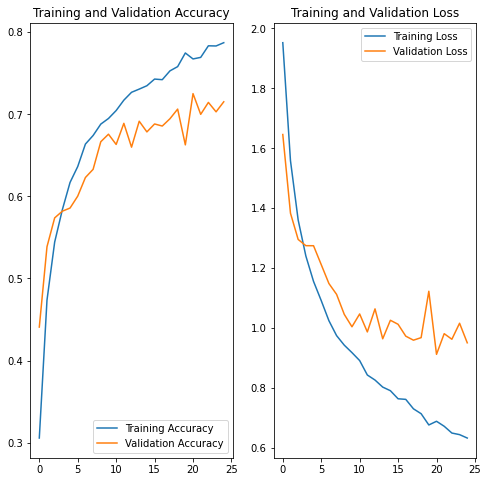

In [88]:
epochs = 25
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [94]:
model.summary()

Model: "sequential_158"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_157 (Sequential)  (None, 130, 130, 3)      0         
                                                                 
 rescaling_70 (Rescaling)    (None, 130, 130, 3)       0         
                                                                 
 conv2d_281 (Conv2D)         (None, 130, 130, 16)      448       
                                                                 
 max_pooling2d_277 (MaxPooli  (None, 65, 65, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_282 (Conv2D)         (None, 65, 65, 32)        4640      
                                                                 
 max_pooling2d_278 (MaxPooli  (None, 32, 32, 32)       0         
 ng2D)                                              